In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('NSE-TATAGLOBAL11.csv')

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [7]:
df['Date']=pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index=df['Date']

In [8]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-10-08,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


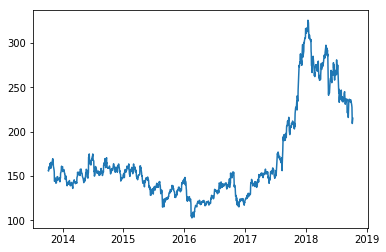

In [9]:
plt.plot(df['Close'],label='Closing Price of Stock')

In [10]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,Dropout,LSTM

Using TensorFlow backend.


In [11]:
data=df.sort_index(ascending=True,axis=0)

In [12]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2013-10-08,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
2013-10-09,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2013-10-10,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
2013-10-11,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
2013-10-14,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [13]:
new_data=pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

In [14]:
new_data.head(3)

,Date,Close
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN


In [15]:
for i in range(0,len(data)):
    new_data['Date'][i]=data['Date'][i]
    new_data['Close'][i]=data['Close'][i]

In [16]:
new_data.head(3)

,Date,Close
0,2013-10-08 00:00:00,155.8
1,2013-10-09 00:00:00,155.55
2,2013-10-10 00:00:00,160.15


In [17]:
new_data.index=new_data.Date

In [18]:
new_data.drop('Date',axis=1,inplace=True)

In [19]:
new_data.head(3)

,Close
Date,
2013-10-08,155.8
2013-10-09,155.55
2013-10-10,160.15


In [20]:
dataset=new_data.values

In [21]:
dataset

array([[155.8],
       [155.55],
       [160.15],
       ...,
       [218.2],
       [209.2],
       [215.15]], dtype=object)

In [22]:
len(dataset)

1235

In [25]:
train=dataset[0:987,:]
valid=dataset[987:,:]

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

/home/yash/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [27]:
scaled_data

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [28]:
x_train=[]
y_train=[]
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

In [29]:
x_train=np.array(x_train)

In [30]:
y_train=np.array(y_train)

In [31]:
x_train[0]

array([0.23823398, 0.2371134 , 0.25773196, 0.25728373, 0.25459435,
       0.24831914, 0.2660242 , 0.27588525, 0.2552667 , 0.26535186,
       0.25145675, 0.28148812, 0.27431645, 0.27162707, 0.26781712,
       0.27947109, 0.27498879, 0.29157329, 0.29964142, 0.29112506,
       0.27297176, 0.25862842, 0.25750784, 0.2415957 , 0.23263111,
       0.18668758, 0.18511878, 0.20192739, 0.18780816, 0.19139399,
       0.18377409, 0.17548185, 0.17817122, 0.19206634, 0.19004931,
       0.20170327, 0.20730614, 0.20909906, 0.19789332, 0.19229045,
       0.19722098, 0.19520394, 0.19744509, 0.20080681, 0.19878978,
       0.19766921, 0.19049753, 0.18287763, 0.18870462, 0.20416853,
       0.20103093, 0.22613178, 0.23330345, 0.2447333 , 0.26176602,
       0.24831914, 0.25616316, 0.25907665, 0.25930076, 0.23442403])

In [32]:
x_train.shape

(927, 60)

In [33]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [34]:
x_train

array([[[0.23823398],
        [0.2371134 ],
        [0.25773196],
        ...,
        [0.25907665],
        [0.25930076],
        [0.23442403]],

       [[0.2371134 ],
        [0.25773196],
        [0.25728373],
        ...,
        [0.25930076],
        [0.23442403],
        [0.24069924]],

       [[0.25773196],
        [0.25728373],
        [0.25459435],
        ...,
        [0.23442403],
        [0.24069924],
        [0.24271627]],

       ...,

       [[0.24697445],
        [0.28641865],
        [0.29964142],
        ...,
        [0.45047064],
        [0.46234872],
        [0.46526221]],

       [[0.28641865],
        [0.29964142],
        [0.31869117],
        ...,
        [0.46234872],
        [0.46526221],
        [0.45853877]],

       [[0.29964142],
        [0.31869117],
        [0.32608696],
        ...,
        [0.46526221],
        [0.45853877],
        [0.4787091 ]]])

In [35]:
model=Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [45]:
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)

Epoch 1/1
 - 110s - loss: 0.0013


In [46]:
inputs=new_data[len(new_data)-len(valid)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

In [47]:
x_test=[]
for i in range(60,inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])

In [48]:
x_test=np.array(x_test)

In [49]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [50]:
closing_price=model.predict(x_test)

In [51]:
closing_price=scaler.inverse_transform(closing_price)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


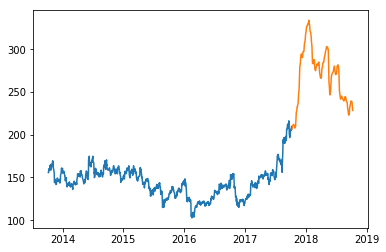

In [52]:
train=new_data[:987]
valid=new_data[987:]
valid['Prediction']=closing_price
plt.plot(train['Close'])
plt.plot(valid[['Prediction']])